In [173]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV para um dataframe
file_path = 'data/curitiba_covid.csv'

data = pd.read_csv(file_path, delimiter=';')

# Exibir as primeiras linhas do dataframe
data.head()


,DATA INCLUSÃO/ NOTIFICAÇÃO,CLASSIFICAÇÃO FINAL,IDADE (anos),SEXO,BAIRRO,DISTRITO RESIDÊNCIA,INTERNADO (SIM/NÃO),DATA COLETA EXAME,DATA ÓBITO,ENCERRAMENTO
0,11/03/2020,CONFIRMADO,54,M,CRISTO REI,DSMZ,NÃO,09/03/2020,NaN,RECUPERADO
1,12/03/2020,CONFIRMADO,15,M,XAXIM,DSBQ,NÃO,08/03/2020,NaN,RECUPERADO
2,12/03/2020,CONFIRMADO,43,M,XAXIM,DSBQ,NÃO,09/03/2020,NaN,RECUPERADO
3,12/03/2020,CONFIRMADO,25,F,CRISTO REI,DSMZ,NÃO,09/03/2020,NaN,RECUPERADO
4,12/03/2020,CONFIRMADO,58,M,MERCÊS,DSMZ,NÃO,09/03/2020,NaN,RECUPERADO


In [174]:
# Verificar dados faltantes e tipos de dados
missing_data = data.isnull().sum()
data_info = data.info()

missing_data, data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638846 entries, 0 to 638845
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   DATA INCLUSÃO/ NOTIFICAÇÃO  638846 non-null  object
 1   CLASSIFICAÇÃO FINAL         638846 non-null  object
 2   IDADE (anos)                638846 non-null  int64 
 3   SEXO                        638846 non-null  object
 4   BAIRRO                      627956 non-null  object
 5   DISTRITO RESIDÊNCIA         627949 non-null  object
 6   INTERNADO (SIM/NÃO)         638846 non-null  object
 7   DATA COLETA EXAME           638846 non-null  object
 8   DATA ÓBITO                  8909 non-null    object
 9   ENCERRAMENTO                638846 non-null  object
dtypes: int64(1), object(9)
memory usage: 48.7+ MB


(DATA INCLUSÃO/ NOTIFICAÇÃO         0
 CLASSIFICAÇÃO FINAL                0
 IDADE (anos)                       0
 SEXO                               0
 BAIRRO                         10890
 DISTRITO RESIDÊNCIA            10897
 INTERNADO (SIM/NÃO)                0
 DATA COLETA EXAME                  0
 DATA ÓBITO                    629937
 ENCERRAMENTO                       0
 dtype: int64,
 None)

In [175]:
# Converter colunas de datas para o formato datetime
data['DATA INCLUSÃO/ NOTIFICAÇÃO'] = pd.to_datetime(data['DATA INCLUSÃO/ NOTIFICAÇÃO'], format='%d/%m/%Y')
data['DATA COLETA EXAME'] = pd.to_datetime(data['DATA COLETA EXAME'], format='%d/%m/%Y')
data['DATA ÓBITO'] = pd.to_datetime(data['DATA ÓBITO'], format='%d/%m/%Y')

# Verificar a consistência dos dados categóricos
unique_values = {
    'CLASSIFICAÇÃO FINAL': data['CLASSIFICAÇÃO FINAL'].unique(),
    'SEXO': data['SEXO'].unique(),
    'INTERNADO (SIM/NÃO)': data['INTERNADO (SIM/NÃO)'].unique(),
    'ENCERRAMENTO': data['ENCERRAMENTO'].unique()
}

unique_values

{'CLASSIFICAÇÃO FINAL': array(['CONFIRMADO'], dtype=object),
 'SEXO': array(['M', 'F', 'm', 'f'], dtype=object),
 'INTERNADO (SIM/NÃO)': array(['NÃO', 'SIM', 'sIM', 'Não'], dtype=object),
 'ENCERRAMENTO': array(['RECUPERADO', 'ÓBITO CONF', 'ATIVO'], dtype=object)}

In [176]:
# Uniformizar os valores de "SEXO"
data['SEXO'] = data['SEXO'].str.upper()

# Uniformizar os valores de "INTERNADO (SIM/NÃO)"
data['INTERNADO (SIM/NÃO)'] = data['INTERNADO (SIM/NÃO)'].str.upper()
data['INTERNADO (SIM/NÃO)'] = data['INTERNADO (SIM/NÃO)'].replace({'SIM': 'SIM', 'NÃO': 'NÃO', 'NÃO': 'NÃO', 'SIM': 'SIM'})

# Verificar novamente os valores únicos após a correção
unique_values_corrected = {
    'SEXO': data['SEXO'].unique(),
    'INTERNADO (SIM/NÃO)': data['INTERNADO (SIM/NÃO)'].unique()
}

unique_values_corrected


{'SEXO': array(['M', 'F'], dtype=object),
 'INTERNADO (SIM/NÃO)': array(['NÃO', 'SIM'], dtype=object)}

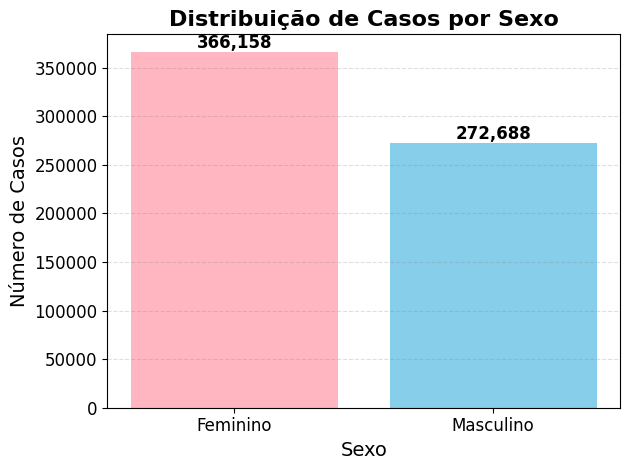

In [177]:
# Distribuição de casos por sexo
sex_distribution = data["SEXO"].value_counts()

# Melhorar o gráfico
fig, ax = plt.subplots()
colors = [
    "lightpink",
    "skyblue",
]
bars = ax.bar(sex_distribution.index, sex_distribution.values, color=colors)

# Adicionar valores sobre as barras
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:,}",
        ha="center",
        va="bottom",
        fontsize=12,
        fontweight="bold",
    )

# Título e rótulos
ax.set_title("Distribuição de Casos por Sexo", fontsize=16, fontweight="bold")
ax.set_xlabel("Sexo", fontsize=14)
ax.set_ylabel("Número de Casos", fontsize=14)
ax.set_xticks([0, 1])
ax.set_xticklabels(["Feminino", "Masculino"], fontsize=12)
ax.tick_params(axis="y", labelsize=12)

# Grade
ax.yaxis.grid(True, linestyle="--", which="major", color="grey", alpha=0.25)

# Mostrar gráfico
plt.tight_layout()
plt.show()


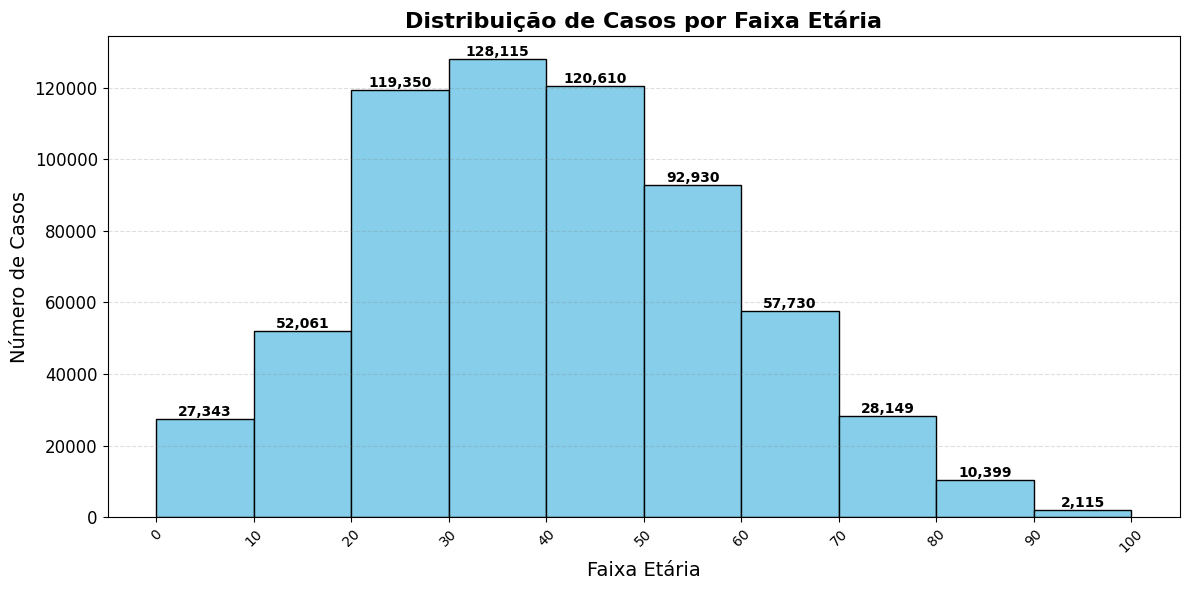

In [178]:
# Ajustar os dados
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
data['Faixa Etária'] = pd.cut(data['IDADE (anos)'], bins=bins, labels=labels, right=False)

# Criar o histograma
fig, ax = plt.subplots(figsize=(12, 6))
n, bins, patches = ax.hist(data['IDADE (anos)'], bins=bins, color='skyblue', edgecolor='black')

# Adicionar valores sobre as barras
for patch in patches:
    height = patch.get_height()
    ax.text(
        patch.get_x() + patch.get_width() / 2, 
        height, 
        f'{int(height):,}', 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        fontweight='bold'
    )

# Título e rótulos
ax.set_title('Distribuição de Casos por Faixa Etária', fontsize=16, fontweight='bold')
ax.set_xlabel('Faixa Etária', fontsize=14)
ax.set_ylabel('Número de Casos', fontsize=14)
ax.set_xticks(bins)
ax.tick_params(axis='y', labelsize=12)

# Grade
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

# Melhorar layout
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar gráfico
plt.show()

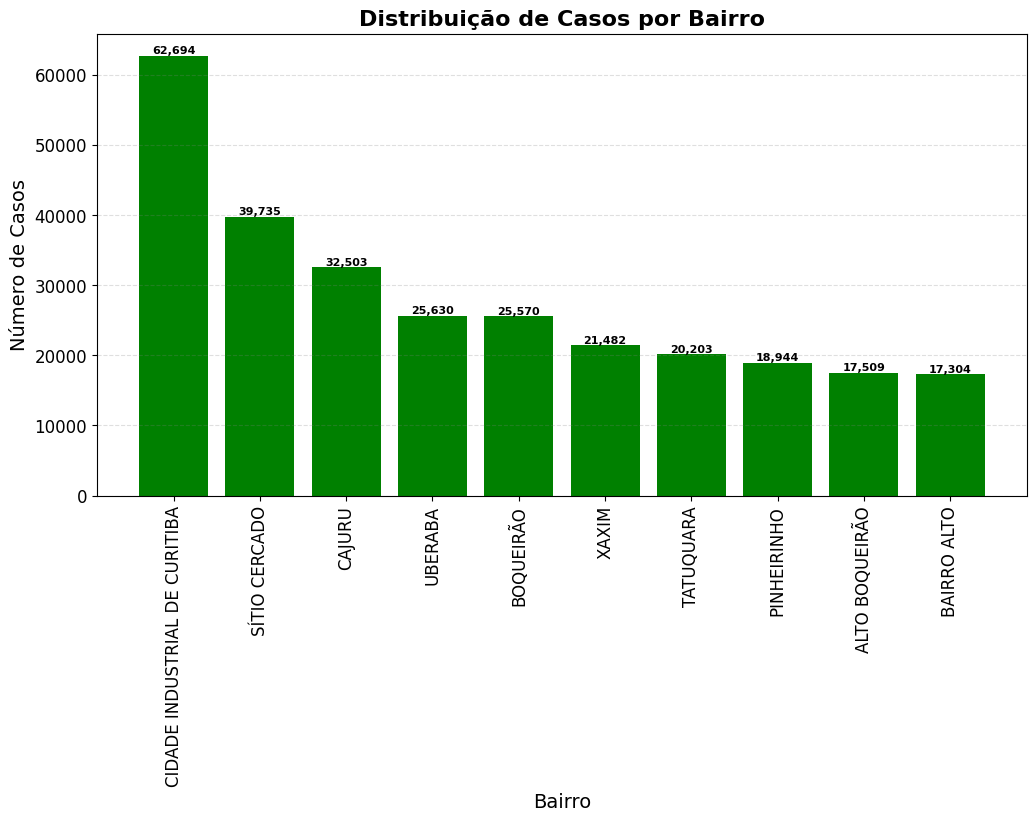

In [179]:
# Ajustar os dados
neighborhood_distribution = data['BAIRRO'].value_counts().head(10)

# Melhorar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(neighborhood_distribution.index, neighborhood_distribution.values, color='green')

# Adicionar valores sobre as barras
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'{height:,}', 
        ha='center', 
        va='bottom', 
        fontsize=8, 
        fontweight='bold'
    )

# Título e rótulos
ax.set_title('Distribuição de Casos por Bairro', fontsize=16, fontweight='bold')
ax.set_xlabel('Bairro', fontsize=14)
ax.set_ylabel('Número de Casos', fontsize=14)
ax.set_xticks(range(len(neighborhood_distribution.index)))
ax.set_xticklabels(neighborhood_distribution.index, fontsize=12, rotation=90)
ax.tick_params(axis='y', labelsize=12)

# Grade
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

# Mostrar gráfico
plt.show()

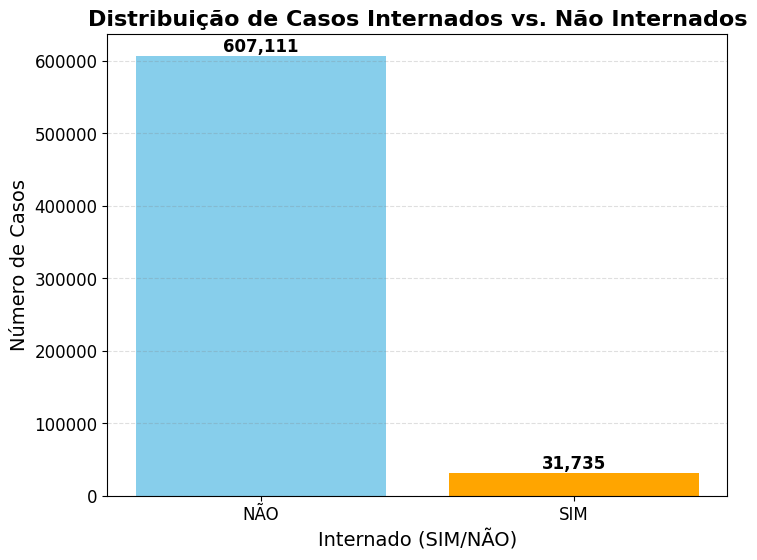

In [180]:
# Contar os casos internados e não internados
interned_distribution = data['INTERNADO (SIM/NÃO)'].value_counts()

# Melhorar o gráfico
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(interned_distribution.index, interned_distribution.values, color=['skyblue', 'orange'])

# Adicionar valores sobre as barras
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'{height:,}', 
        ha='center', 
        va='bottom', 
        fontsize=12, 
        fontweight='bold'
    )

# Título e rótulos
ax.set_title('Distribuição de Casos Internados vs. Não Internados', fontsize=16, fontweight='bold')
ax.set_xlabel('Internado (SIM/NÃO)', fontsize=14)
ax.set_ylabel('Número de Casos', fontsize=14)
ax.set_xticks(interned_distribution.index)
ax.set_xticklabels(interned_distribution.index, fontsize=12)
ax.tick_params(axis='y', labelsize=12)

# Grade
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

# Mostrar gráfico
plt.show()


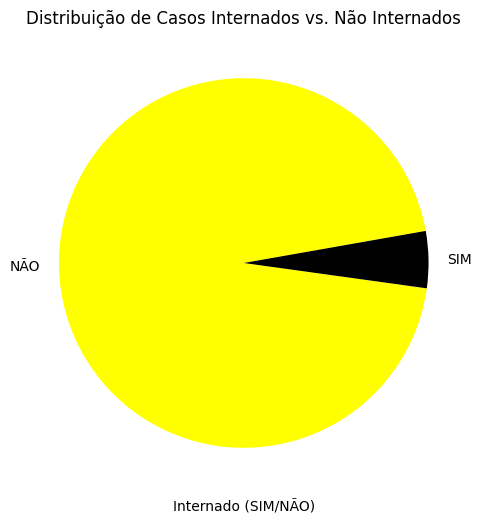

In [181]:
# Plotar a distribuição
# Gráfico de PAC MAN

plt.figure(figsize=(8, 6))
interned_distribution.plot(kind='pie', colors=['yellow', 'black'], startangle=10)
plt.title('Distribuição de Casos Internados vs. Não Internados')
plt.xlabel('Internado (SIM/NÃO)')
plt.ylabel('')
plt.xticks(rotation=0)
plt.show()

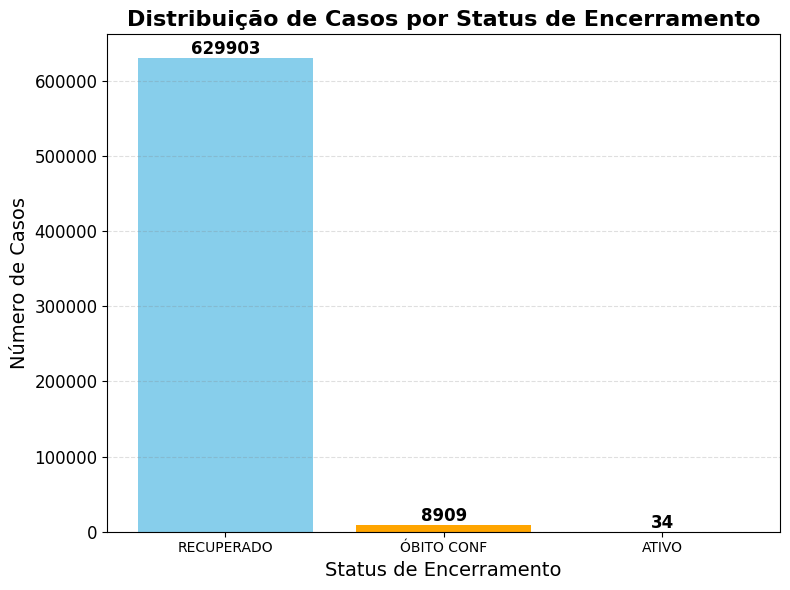

In [182]:
# Contar os casos por status de encerramento
encerramento = data['ENCERRAMENTO'].value_counts()

# Melhorar o gráfico
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(encerramento.index, encerramento.values, color=['skyblue', 'orange', 'green'])

# Adicionar os valores nas barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Título e rótulos
ax.set_title('Distribuição de Casos por Status de Encerramento', fontsize=16, fontweight='bold')
ax.set_xlabel('Status de Encerramento', fontsize=14)
ax.set_ylabel('Número de Casos', fontsize=14)
ax.tick_params(axis='y', labelsize=12)

# Grade
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

# Mostrar gráfico
plt.tight_layout()
plt.show()



C:\Users\rodri\AppData\Local\Temp\ipykernel_23612\1448981533.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  faixa_etaria_sexo = data.groupby('Faixa Etária')['SEXO'].value_counts().unstack().fillna(0)


<Figure size 1200x800 with 0 Axes>

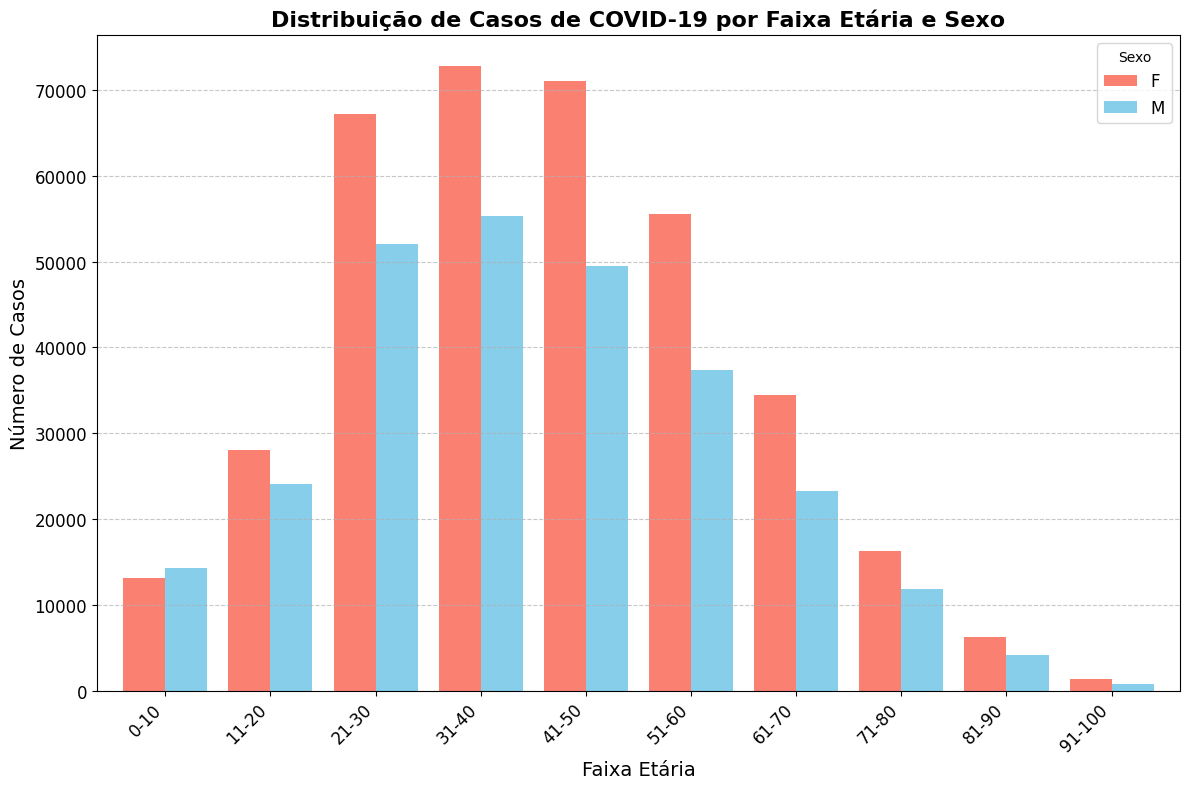

In [183]:
# Agrupar os dados por faixa etária e sexo, e contar os casos
faixa_etaria_sexo = data.groupby('Faixa Etária')['SEXO'].value_counts().unstack().fillna(0)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))  # Ajustar o tamanho do gráfico

# Plotar o gráfico de barras
ax = faixa_etaria_sexo.plot(kind='bar', figsize=(12, 8), width=0.8, color=['salmon', 'skyblue'])

# Personalizar o gráfico
plt.xlabel('Faixa Etária', fontsize=14)
plt.ylabel('Número de Casos', fontsize=14)
plt.title('Distribuição de Casos de COVID-19 por Faixa Etária e Sexo', fontsize=16, fontweight='bold')
plt.legend(title='Sexo', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.tight_layout()
plt.show()

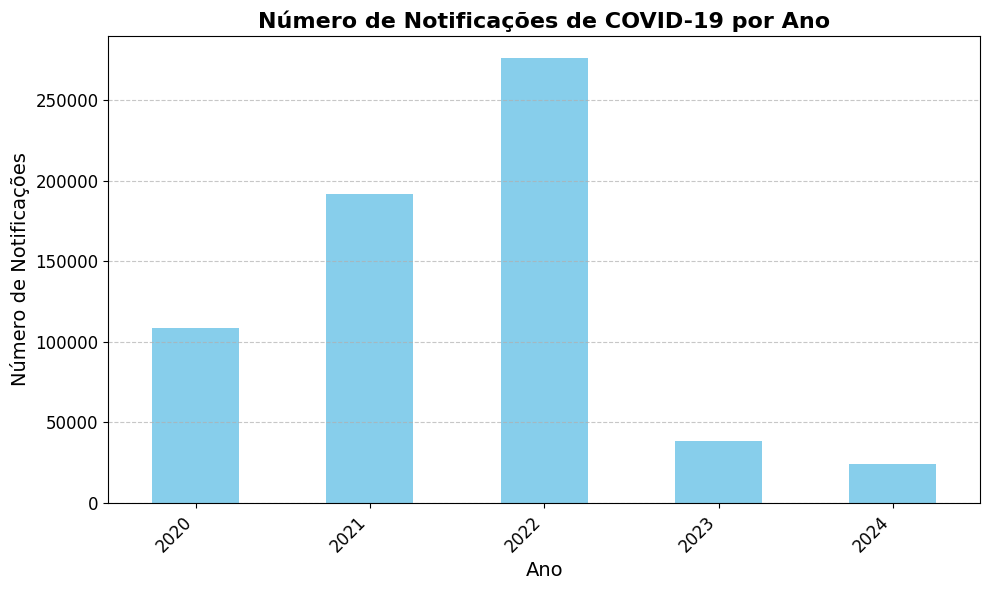

In [189]:
# Converta a coluna 'DATA INCLUSÃO/ NOTIFICAÇÃO' para o tipo datetime, se necessário
data['DATA INCLUSÃO/ NOTIFICAÇÃO'] = pd.to_datetime(data['DATA INCLUSÃO/ NOTIFICAÇÃO'])

# Agrupe os dados por ano e conte o número de notificações em cada ano
data_inclusao = data['DATA INCLUSÃO/ NOTIFICAÇÃO'].groupby(data['DATA INCLUSÃO/ NOTIFICAÇÃO'].dt.year).count()

# Crie o gráfico de barras
plt.figure(figsize=(10, 6))  # Ajuste o tamanho do gráfico conforme necessário

# Plote o gráfico de barras
data_inclusao.plot(kind='bar', color='skyblue')

# Personalize o gráfico
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Número de Notificações', fontsize=14)
plt.title('Número de Notificações de COVID-19 por Ano', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exiba o gráfico
plt.tight_layout()
plt.show()

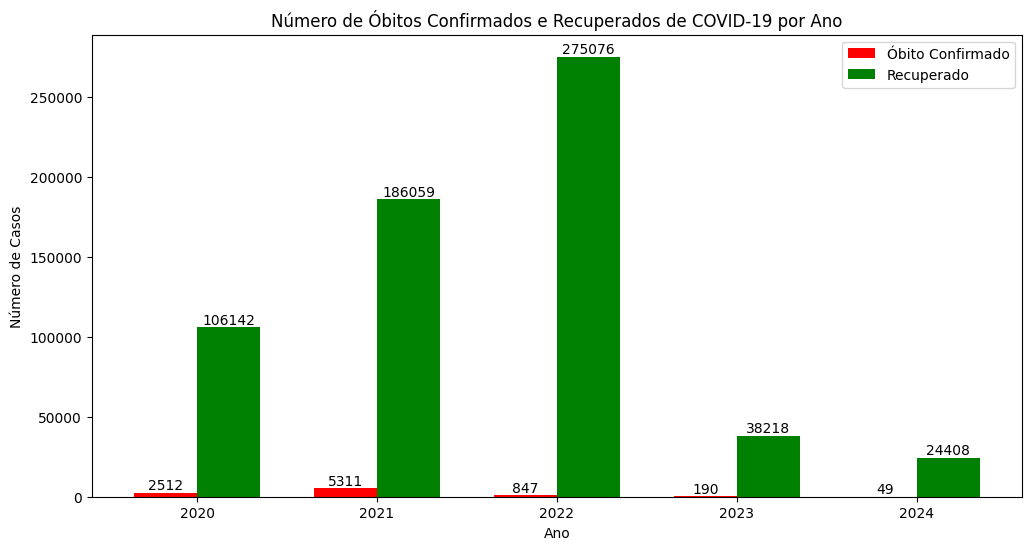

In [185]:
data['ANO'] = data['DATA INCLUSÃO/ NOTIFICAÇÃO'].dt.year

# Agrupar os dados por ano e situação (encerramento) e contar os casos
situacao_por_ano = data.groupby(['ANO', 'ENCERRAMENTO'])['ENCERRAMENTO'].count().unstack().reset_index()

# Substituir NaN por 0 para facilitar a plotagem
situacao_por_ano = situacao_por_ano.fillna(0)

# Criar o gráfico de barras lado a lado para óbitos confirmados e recuperados por ano
plt.figure(figsize=(12, 6))

bar_width = 0.35
index = situacao_por_ano['ANO']

# Plotar os dados
bar1 = plt.bar(index, situacao_por_ano['ÓBITO CONF'], bar_width, label='Óbito Confirmado', color='red')
bar2 = plt.bar(index + bar_width, situacao_por_ano['RECUPERADO'], bar_width, label='Recuperado', color='green')

# Adicionar os valores nas barras
for bar in bar1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

for bar in bar2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

# Personalizar o gráfico
plt.xlabel('Ano')
plt.ylabel('Número de Casos')
plt.title('Número de Óbitos Confirmados e Recuperados de COVID-19 por Ano')
plt.xticks(index + bar_width / 2, situacao_por_ano['ANO'])  # Ajustar a posição dos rótulos do eixo X
plt.legend()

# Exibir o gráfico
plt.show()